<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [3]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [6]:
dataset[important_cols]

year ISO_code    countries                         region  \
0     2017      ALB      Albania                 Eastern Europe   
1     2017      DZA      Algeria     Middle East & North Africa   
2     2017      AGO       Angola             Sub-Saharan Africa   
3     2017      ARG    Argentina  Latin America & the Caribbean   
4     2017      ARM      Armenia        Caucasus & Central Asia   
...    ...      ...          ...                            ...   
1615  2008      AUS    Australia                        Oceania   
1616  2008      DNK      Denmark                 Western Europe   
1617  2008      CHE  Switzerland                 Western Europe   
1618  2008      NZL  New Zealand                        Oceania   
1619  2008      HKG    Hong Kong                      East Asia   

     pf_identity_legal pf_identity_sex_male pf_identity_sex_female  \
0                    0                   10                     10   
1                    -                    0                      0   
2                   10                    0                      0   
3                   10                   10                     10   
4                    7                   10                     10   
...                ...                  ...                    ...   
1615                 -                   10                     10   
1616                 -                   10                     10   
1617                 -                   10                     10   
1618                 -                   10                     10   
1619                 -                   10                     10   

     pf_identity_sex pf_identity_divorce pf_identity pf_score pf_rank  \
0                 10                 7.5         5.8     8.01      46   
1                  0                   0           0      5.2     146   
2                  0                   5           5     5.98     121   
3                 10                  10          10     8.04      41   
4                 10                 7.5         8.2     7.15      72   
...              ...                 ...         ...      ...     ...   
1615              10                  10          10     9.29       7   
1616              10                  10          10     9.49       3   
1617              10                  10          10     9.31       6   
1618              10                  10          10     9.42       4   
1619              10                  10          10     9.13      12   

     ef_score ef_rank hf_score hf_rank  
0        7.67      30     7.84      38  
1        4.77     159     4.99     155  
2        4.83     158      5.4     151  
3        5.67     147     6.86      77  
4         7.7      27     7.42      54  
...       ...     ...      ...     ...  
1615     8.18       6     8.73       4  
1616     7.98       9     8.73       4  
1617     8.35       4     8.83       3  
1618     8.46       3     8.94       2  
1619     9.11       1     9.12       1  

[1620 rows x 16 columns]

Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [7]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [8]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

year ISO_code    countries                         region  \
0     2017      ALB      Albania                 Eastern Europe   
1     2017      DZA      Algeria     Middle East & North Africa   
2     2017      AGO       Angola             Sub-Saharan Africa   
3     2017      ARG    Argentina  Latin America & the Caribbean   
4     2017      ARM      Armenia        Caucasus & Central Asia   
...    ...      ...          ...                            ...   
1615  2008      AUS    Australia                        Oceania   
1616  2008      DNK      Denmark                 Western Europe   
1617  2008      CHE  Switzerland                 Western Europe   
1618  2008      NZL  New Zealand                        Oceania   
1619  2008      HKG    Hong Kong                      East Asia   

      pf_identity_legal  pf_identity_sex_male  pf_identity_sex_female  \
0                   0.0                  10.0                    10.0   
1                   NaN                   0.0                     0.0   
2                  10.0                   0.0                     0.0   
3                  10.0                  10.0                    10.0   
4                   7.0                  10.0                    10.0   
...                 ...                   ...                     ...   
1615                NaN                  10.0                    10.0   
1616                NaN                  10.0                    10.0   
1617                NaN                  10.0                    10.0   
1618                NaN                  10.0                    10.0   
1619                NaN                  10.0                    10.0   

      pf_identity_sex  pf_identity_divorce  pf_identity  pf_score  pf_rank  \
0                10.0                  7.5          5.8      8.01     46.0   
1                 0.0                  0.0          0.0      5.20    146.0   
2                 0.0                  5.0          5.0      5.98    121.0   
3                10.0                 10.0         10.0      8.04     41.0   
4                10.0                  7.5          8.2      7.15     72.0   
...               ...                  ...          ...       ...      ...   
1615             10.0                 10.0         10.0      9.29      7.0   
1616             10.0                 10.0         10.0      9.49      3.0   
1617             10.0                 10.0         10.0      9.31      6.0   
1618             10.0                 10.0         10.0      9.42      4.0   
1619             10.0                 10.0         10.0      9.13     12.0   

      ef_score  ef_rank  hf_score  hf_rank  
0         7.67     30.0      7.84     38.0  
1         4.77    159.0      4.99    155.0  
2         4.83    158.0      5.40    151.0  
3         5.67    147.0      6.86     77.0  
4         7.70     27.0      7.42     54.0  
...        ...      ...       ...      ...  
1615      8.18      6.0      8.73      4.0  
1616      7.98      9.0      8.73      4.0  
1617      8.35      4.0      8.83      3.0  
1618      8.46      3.0      8.94      2.0  
1619      9.11      1.0      9.12      1.0  

[1620 rows x 16 columns]

# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  3. ¿Tiene sentido calcular la moda?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

#### 1.1 El rango de las vairables calculado es el siguiente:
Para determinarlo utilizamos los metodos min y max que operan sobre las columnas del dataframe y presenta los resultados asociados a los nombres o labels de las columnas.


In [9]:
ranges = {}
for column in dataset.select_dtypes(include=['float']).columns:
    ranges[column]=([dataset[column].max() - dataset[column].min(),dataset[column].min(),dataset[column].max()])


df_ranges= pandas.DataFrame(ranges).transpose()
df_ranges.columns= ['Rango','Min','Max']
display(df_ranges)

Rango   Min     Max
pf_identity_legal        10.00  0.00   10.00
pf_identity_sex_male     10.00  0.00   10.00
pf_identity_sex_female   10.00  0.00   10.00
pf_identity_sex          10.00  0.00   10.00
pf_identity_divorce      10.00  0.00   10.00
pf_identity              10.00  0.00   10.00
pf_score                  7.34  2.22    9.56
pf_rank                 161.00  1.00  162.00
ef_score                  6.53  2.58    9.11
ef_rank                 161.00  1.00  162.00
hf_score                  5.43  3.69    9.12
hf_rank                 161.00  1.00  162.00

1.2 No es conveniente quedarse con un único valor ni tampoco utilizar todos los valores. Se considera la manera adecuada de hacer a la comparación a calcular media, mediana y desviación estándar de cada variable y luego las comparamos entre sí, analizándolas en conjunto.

1.3 El cálculo se realizó tomando a Latonoamérica y el Caribe por un lado y el resto de los países agrupados como "Rest of the world".
La comparación es válida ya que, como se describió en el punto anterior, se  comparan valores de media, mediana y desviación estándar de las regiones de manera simultánea.

In [10]:
df_rest_world = dataset.copy()
df_rest_world.loc[df_rest_world.region != 'Latin America & the Caribbean', 'region'] = 'Rest of the world'
df_rest_world = df_rest_world[['year','region','pf_identity','hf_score']]

df_rest_world_mean = df_rest_world.groupby(['region','year']).mean()
df_rest_world_median = df_rest_world.groupby(['region','year']).median()
df_rest_world_std = df_rest_world.groupby(['region','year'])

print("Mean")
display(df_rest_world_mean) 
print("\nMedian")
display(df_rest_world_median)
print("\nStandard Deviation")
display(df_rest_world_std)

Mean


pf_identity  hf_score
region                        year                       
Latin America & the Caribbean 2008     8.904000  7.130000
                              2009     8.904000  7.112000
                              2010     8.946154  7.087692
                              2011     9.138462  7.090000
                              2012     9.138462  7.049615
                              2013     9.138462  7.027308
                              2014     9.042308  7.005769
                              2015     7.569231  6.960000
                              2016     7.665385  6.962308
                              2017     7.400000  6.951538
Rest of the world             2008     7.467241  7.066810
                              2009     7.467241  7.076810
                              2010     7.186614  7.024567
                              2011     7.107874  6.999134
                              2012     7.107874  6.963386
                              2013     7.016031  6.958855
                              2014     7.098496  6.939023
                              2015     6.845865  6.914887
                              2016     6.718382  6.879412
                              2017     6.324265  6.875809


Median


pf_identity  hf_score
region                        year                       
Latin America & the Caribbean 2008        10.00     7.130
                              2009        10.00     7.060
                              2010        10.00     7.085
                              2011        10.00     7.030
                              2012        10.00     7.055
                              2013        10.00     7.045
                              2014        10.00     6.965
                              2015         6.70     6.925
                              2016         6.70     6.985
                              2017         6.70     6.915
Rest of the world             2008         8.80     6.965
                              2009         8.80     6.945
                              2010         8.80     6.910
                              2011         8.80     6.920
                              2012         8.80     6.830
                              2013         8.80     6.850
                              2014         8.80     6.710
                              2015         8.80     6.690
                              2016         8.20     6.710
                              2017         7.85     6.745


Standard Deviation


1.4 No, no tiene sentido calcular la moda sin un rango de valores ya que es difícil que exista una frecuencia considerable de valores con decimales.

1.5 Los valores faltantes pueden sanearse reemplazándolos con el promedio de la columna ya que no afectan al comportamiento general de los datos.
Otra posibilidad planteada consiste en segmentar los datos de acuerdo a ciertas caracterísicas como, en este caso, su región o el año y reemplazarlos por el promedio del segmento. Por ejemplo, el valor de un país en determinado año, se puede completar con el promedio de los años anteriores de ese país.

1.6 Si, se han encontrado outliers en estas dos variables. Para detectarlos se optó por utilizar gráficos de caja, los cuales permiten visualizar, además de estadísticos como la media y la desviación estándar, aquellos que caen fuera de la desviación, los outliers. A continuación se presenta el gráfico:

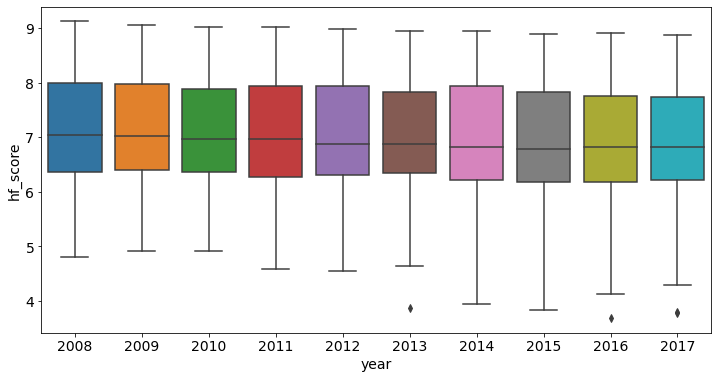

In [11]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('hf_score', fontsize=14)
plt.xlabel('', fontsize=14)
box = seaborn.boxplot(x=dataset.year, y=dataset.hf_score)

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

2.1 La mediana a través de los años es la siguiente:

In [12]:
mean_by_years = dataset.groupby(['year'])[['pf_identity', 'hf_score']].mean()
mean_by_years.reset_index(inplace=True)
mean_by_years

year  pf_identity  hf_score
0  2008     7.721986  7.078014
1  2009     7.721986  7.083050
2  2010     7.485621  7.035294
3  2011     7.452941  7.014575
4  2012     7.452941  6.978039
5  2013     7.367516  6.970191
6  2014     7.416352  6.949937
7  2015     6.964151  6.922264
8  2016     6.870370  6.892716
9  2017     6.496914  6.887963

(array([6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8]),
 <a list of 8 Text major ticklabel objects>)

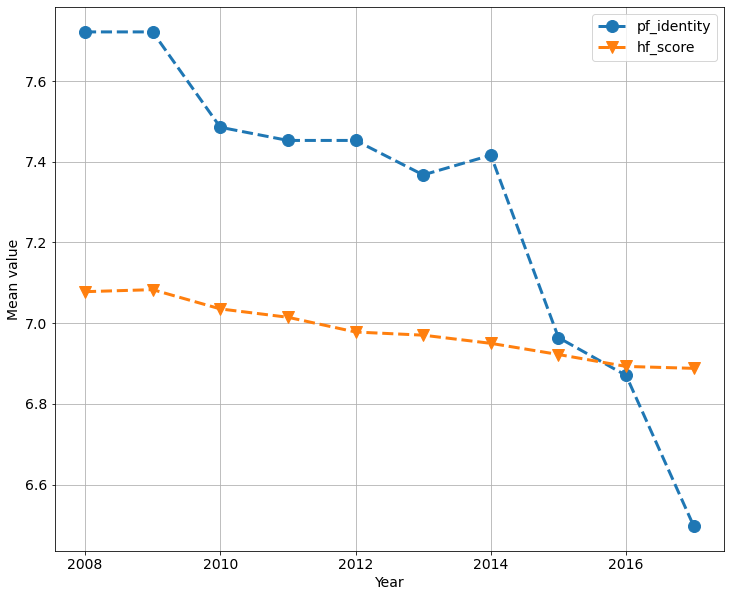

In [13]:
plt.figure(figsize=(12,10))
plt.plot(mean_by_years.year, mean_by_years.pf_identity, '--o', label='pf_identity',linewidth=3, markersize=12)
plt.plot(mean_by_years.year, mean_by_years.hf_score,'--v', label='hf_score',linewidth=3, markersize=12)
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('Mean value', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

2.2 A continuación se proceden a graficar pero separando por regiones:


In [14]:
mean_by_region_years_pf_identity = dataset.groupby(['region','year'])[['pf_identity']].mean()
mean_by_region_years_pf_identity.reset_index(inplace=True)
mean_by_region_years_pf_identity

region  year  pf_identity
0   Caucasus & Central Asia  2008     9.040000
1   Caucasus & Central Asia  2009     9.040000
2   Caucasus & Central Asia  2010     9.000000
3   Caucasus & Central Asia  2011     8.166667
4   Caucasus & Central Asia  2012     8.166667
..                      ...   ...          ...
95           Western Europe  2013     9.933333
96           Western Europe  2014     9.933333
97           Western Europe  2015     9.400000
98           Western Europe  2016     9.400000
99           Western Europe  2017     9.311111

[100 rows x 3 columns]

In [15]:
mean_by_region_years_hf_score = dataset.groupby(['region','year'])[['hf_score']].mean()
mean_by_region_years_hf_score.reset_index(inplace=True)
mean_by_region_years_hf_score

region  year  hf_score
0   Caucasus & Central Asia  2008  6.980000
1   Caucasus & Central Asia  2009  6.974000
2   Caucasus & Central Asia  2010  6.890000
3   Caucasus & Central Asia  2011  6.763333
4   Caucasus & Central Asia  2012  6.841667
..                      ...   ...       ...
95           Western Europe  2013  8.412222
96           Western Europe  2014  8.470000
97           Western Europe  2015  8.450556
98           Western Europe  2016  8.420556
99           Western Europe  2017  8.412778

[100 rows x 3 columns]

In [16]:
mean_by_region_years = dataset.groupby(['region','year'])[['pf_identity', 'hf_score']].mean()
mean_by_region_years.reset_index(inplace=True)

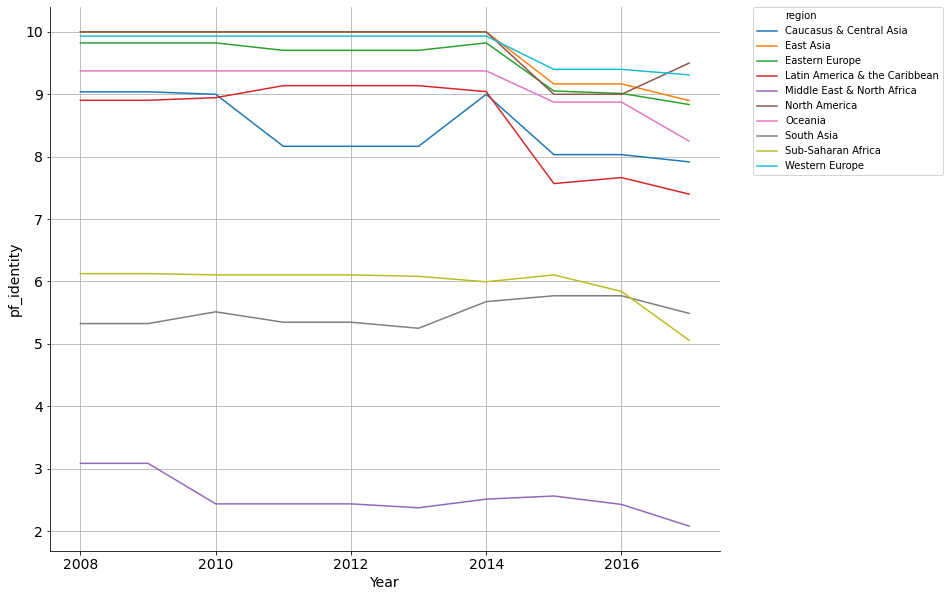

In [17]:
plt.figure(figsize=(12,10))
seaborn.lineplot(x="year", y="pf_identity",
             hue="region",
             markers=True, dashes=False, data=mean_by_region_years)

plt.grid(True)
plt.ylabel('pf_identity', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

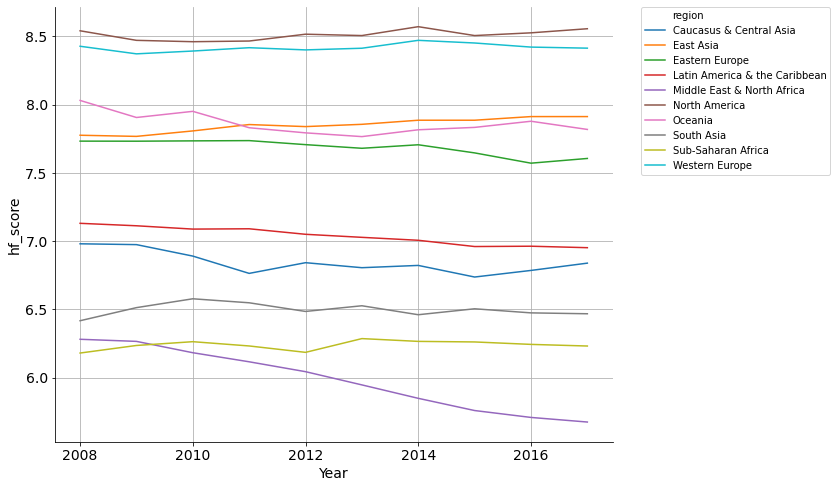

In [18]:
plt.figure(figsize=(10,8))
seaborn.lineplot(x="year", y="hf_score",
             hue="region",
             markers=True, dashes=False, data=mean_by_region_years)

plt.grid(True)
plt.ylabel('hf_score', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

#### - (pf_identity) La tendencia de cada region se asimila a la tendencia global, se puede ver una gran caida a partir del 2014 en casi todas las regiones de mayor puntaje por igual. 
#### - (hf_score) La tendencia no es lo mismo para cada region que para la tendencia global, la mayoria se mantienen constantes pero debido a la gran caida progresiva de la tendendia para medio este y norte de africa, la tendencia lgobal se ve muy afecatad 

2.3 A continuación se procede a graficar la variable pf_identity en países latinoamericanos en particular:

In [19]:
mean_by_latam_country_years = dataset[dataset['region'] == 'Latin America & the Caribbean'].groupby(['countries','year'])[['pf_identity']].mean()
mean_by_latam_country_years.reset_index(inplace=True)
mean_latam = mean_by_region_years[mean_by_region_years['region'] == 'Latin America & the Caribbean']

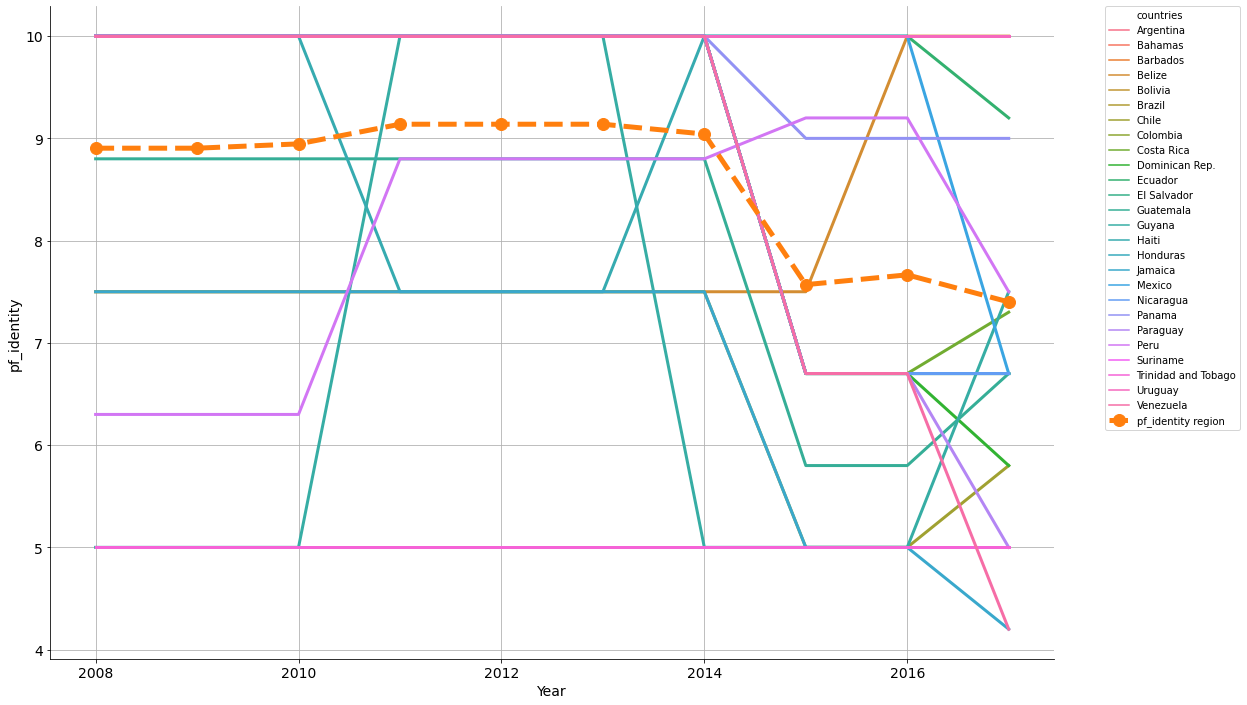

In [20]:
plt.figure(figsize=(18,12))
seaborn.lineplot(x="year", y="pf_identity",
             hue="countries", lw=3,
             markers=True, dashes=False, data=mean_by_latam_country_years)
plt.plot( mean_latam.year, mean_latam.pf_identity, '--o', label='pf_identity region',linewidth=5, markersize=12)

plt.grid(True)
plt.ylabel('pf_identity', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Hay 2 puntos importantes que nos interesa prestar atención, por un lado el período 2010 a 2011 y por otro el de 2014 a 2015.

Del año 2010 a 2011, los responsables del cambio de la tendencia fueron Perú y Guayana (aumento valor) y Haiti (disminuye valor).

A partir del 2014, Brazil, Chile, Costa Rica, República Dominicana, El Salvador y Guatemala disminuye considerablemente su valor.

Sólo por curiosidad...

In [21]:
hf_ef_score_df = dataset.groupby(['year'])[['year','ef_score', 'hf_score']].mean()

(array([6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6]),
 <a list of 7 Text major ticklabel objects>)

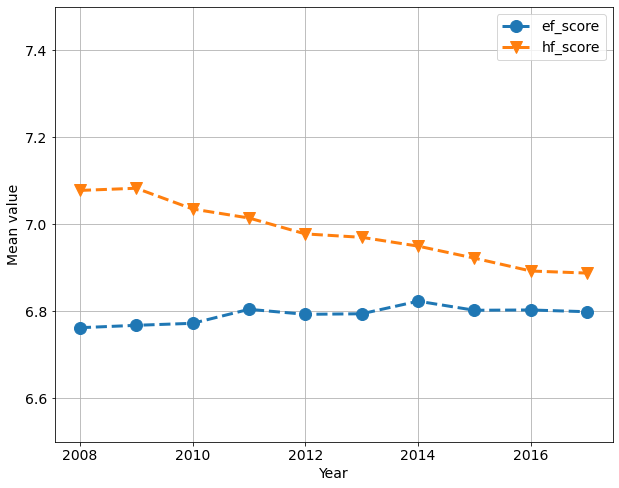

In [22]:
plt.figure(figsize=(10,8))
plt.plot(hf_ef_score_df.year, hf_ef_score_df.ef_score, '--o', label='ef_score',linewidth=3, markersize=12)
plt.plot(hf_ef_score_df.year, hf_ef_score_df.hf_score,'--v', label='hf_score',linewidth=3, markersize=12)
plt.grid(True)
plt.ylim([6.5, 7.5])
plt.legend(fontsize=14)
plt.ylabel('Mean value', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Aunque pareciera que la tendencia de economic freedom es positiva, no impacta lo suficiente en el score de human freedom, que parece ser que tiene otros factores que pueden estar afectandola negativamente. Una hipotesis puede ser que en la gente pesa mas el factor de personal freedom mas que economic freedom.

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


Procederemos antes que nada a eliminar aquellos campos con valor "N/A"...

In [23]:
display(dataset.shape)
dataset = dataset.dropna(subset=['hf_score', 'pf_identity'])
display(dataset.shape)

(1620, 16)

(1540, 16)

Consideramos que analizar los datos por año nos aporta una perspectiva más cercana a la situacion específica de la fecha. Por otro lado, si utilizamos algún estadístico como la media, obtendremos una perspectiva condensada y/o superpuesta de los períodos analizados. En resumen creemos que no es conveniente analizar conjunto de datos de manera condensada sino discriminados por período.

In [24]:
years2choose = [2008,2014,2015,2017]
region_latam_carib = 'Latin America & the Caribbean'

hist = dataset.loc[((dataset['region']==region_latam_carib)&(dataset['year'].isin(years2choose))),['year','pf_identity','hf_score']]
nhist = dataset.loc[((dataset['region']!=region_latam_carib)&(dataset['year'].isin(years2choose))),['year','pf_identity','hf_score']]

Cualitativamente a partir de los histogramas correspondientes a Latinoamérica y el Caribe y al resto del mundo no se puede inferir qué tipo de distribución poseen las variables `pf_identity` respectivas. No obstante, algunas características de la función de distribución beta son coincidentes con las características de los datos bajo análisis. 

*   Sirve para modelar el compartamiento de variables aleatorias limitadas a intervalos finitos. Por ejemplo, beta tiene dominio en el intervalo \[0,1\].
*   Otro aspecto, a priori cualitativo, es que la distribución beta puede tener la moda desplazada hacia el limite derecho o izquierdo.


A modo de comentario, un aspecto a recalcar en el análisis temporal de los histogramas es que entre los años 2008 y 2014 los datos se mantuvieron mayormente concentrados al rededor del valor 10. Sin embargo, luego del año 2015, el histograma sufre una leve polarizacion (cobra un aspecto multi modal), lo que indicaría la aparición de un grupo concentrado con menor libertad personal de identidad. En el caso del resto del mundo si bien existe una redistribución de la concentración a partir del año 2015 no parece ser tan significativa con respecto a Latinoamérica y el Caribe.

Otro aspecto característico de la dsitribución de los datos en Latinoamérica y el Caribe es que los datos se concentran en el rango que va a partir del valor 4 hasta el valor 10 y no fuera de este. En base a esto es que se escogió el numero de bins igual a 5, de modo tal de concentrar los decimales en un único bin, tal como se realizó para el resto del mundo, sólo que el rango en este último caso es 10.

#### Referencias:

* [Wikipedia - Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution)
* [Univariated Distributions Relationship - Beta distribution](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Beta.pdf)
* [Common Probability Distributions: The Data Scientist’s Crib Sheet](https://medium.com/@srowen/common-probability-distributions-347e6b945ce4)

Text(0.5, 0, 'Variables values')

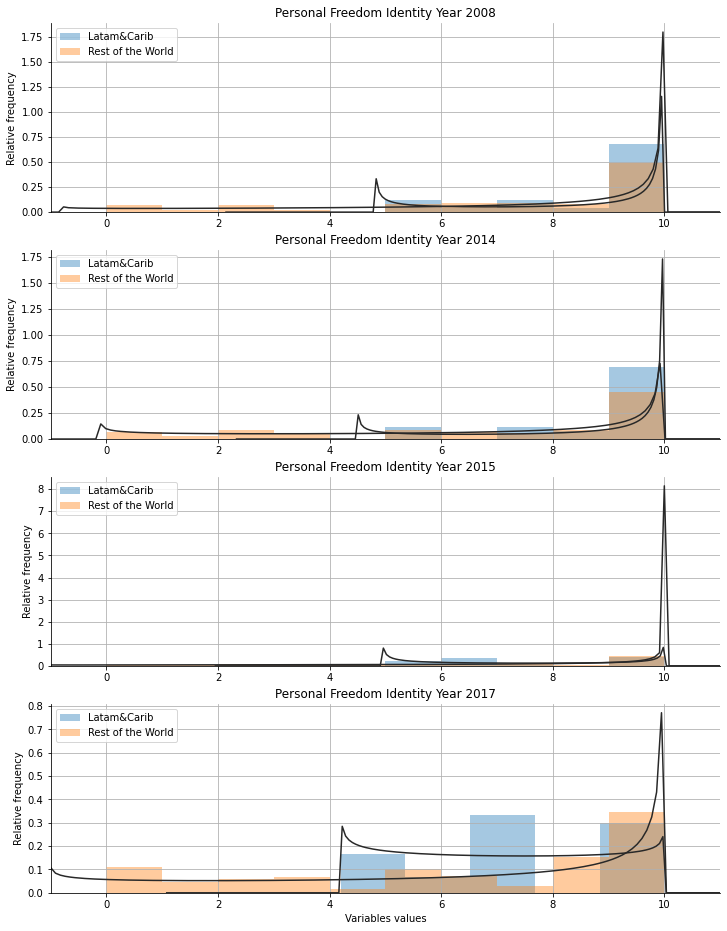

In [25]:
from scipy.stats import beta, norm
plt.figure(figsize=(12,4*len(years2choose)))

for i,y in enumerate(years2choose):
    plt.subplot(len(years2choose),1,i+1)
    seaborn.distplot(hist[hist.year==y].pf_identity, fit=beta, kde=False, bins=5, label='Latam&Carib')
    seaborn.distplot(nhist[nhist.year==y].pf_identity, fit=beta, kde=False,bins=10, label='Rest of the World')
    plt.title(f'Personal Freedom Identity Year {y}')
    plt.ylabel('Relative frequency')
    plt.xlabel('')
    plt.xlim([-1, 11])
    plt.grid(True)
    plt.legend()
    seaborn.despine()
plt.xlabel('Variables values')


Text(0.5, 0, 'Variables values')

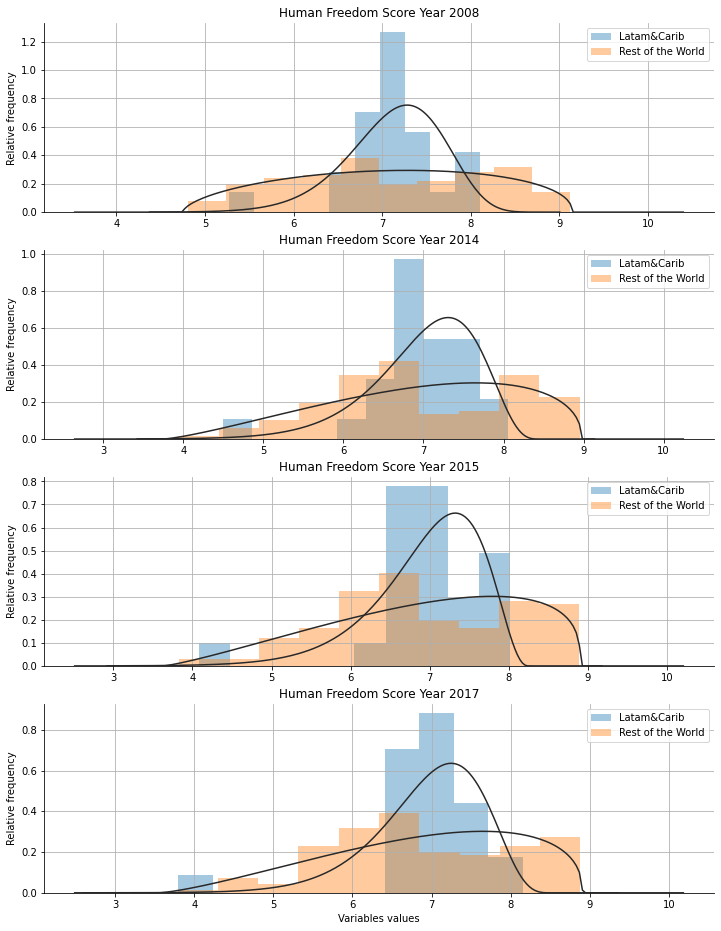

In [26]:
plt.figure(figsize=(12,4*len(years2choose)))

for i,y in enumerate(years2choose):
    plt.subplot(len(years2choose),1,i+1)
    seaborn.distplot(hist[hist.year==y].hf_score, fit=beta, kde=False, bins=10, label='Latam&Carib')
    seaborn.distplot(nhist[nhist.year==y].hf_score, fit=beta, kde=False,bins=10, label='Rest of the World')
    plt.title(f'Human Freedom Score Year {y}')
    plt.xlabel('')
    plt.ylabel('Relative frequency')
    plt.grid(True)
    plt.legend()
    seaborn.despine()
plt.xlabel('Variables values')

Por las características ya mencionadas de la distribución beta y de los histogramas para la variable `hf_score` asumo que la distribución mencionada puede ser un buen candidato para estos datos.

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



4.1 El gráfico pairplot nos permite visualizar la relación que existe entre estas tres variables de forma gráfica y en simultáneo. Por otro lado, no es conveniente para variables discretas, como es el caso de pf_identity ya que no permite visualizar con claridad la frecuencia de muestras que adquieren determinado valor discreto ya que se superponen entre sí. 
En el caso de variables continuas, es más difícil que adquieran exactamente el mismo valor por lo cual habría menos superposición de muestras en el gráfico pairplot. La solución que se propone para comparar una variable discreta contra una continua es discretizar la variable continua y optar por gráficos que permitan ver la frecuencia de manera más clara utilizando parámetros como el color o la intensidad de las muestras en el gráfico.

<Figure size 720x720 with 0 Axes>

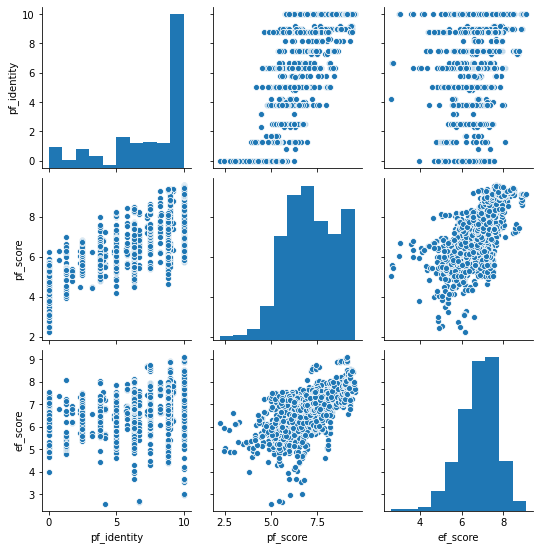

In [27]:
plt.figure(figsize=(10,10))

seaborn.pairplot(dataset[['pf_identity', 'pf_score', 'ef_score']])

#### 4.2 pf_identity y pf_score

<Figure size 720x720 with 0 Axes>

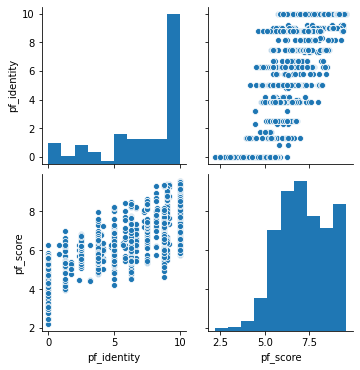

In [28]:
plt.figure(figsize=(10,10))
seaborn.pairplot(dataset[['pf_identity', 'pf_score']])

#### pf_identity y ef_score

<Figure size 720x720 with 0 Axes>

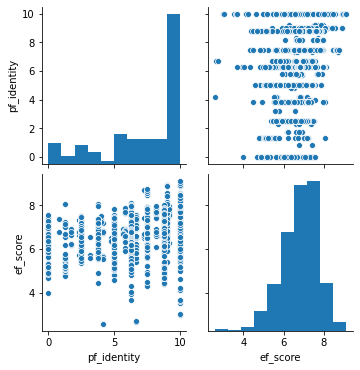

In [29]:
plt.figure(figsize=(10,10))
seaborn.pairplot(dataset[['pf_identity', 'ef_score']])


Respecto a la relación entre pf_id y pf_score, podemos ver que a medida que pf identity es mayor, pf_score tambien lo es. Por otra parte, a la relación entre pf_ide y ef_score vemos que a medida que la libertad personal en ciertos países aumenta, en algunos casos la libertad económica también pero en otros no.

#### 4.3 Se decidió definir como valores de las variables de forma categórica a 'Low', 'Medium' y 'High' respectivamente.

In [30]:
dataset['pf_identity_segment'] = pandas.cut(dataset['pf_identity'], bins=3, labels=['Low', 'Medium', 'High'])
dataset['pf_score_segment'] = pandas.cut(dataset['pf_score'], bins=3, labels=['Low', 'Medium', 'High'])
dataset['ef_score_segment'] = pandas.cut(dataset['ef_score'], bins=3, labels=['Low', 'Medium', 'High'])

#### 4.4 A continuación se presenta la correlación visual entre las 3 variables mediante mapas de calor:

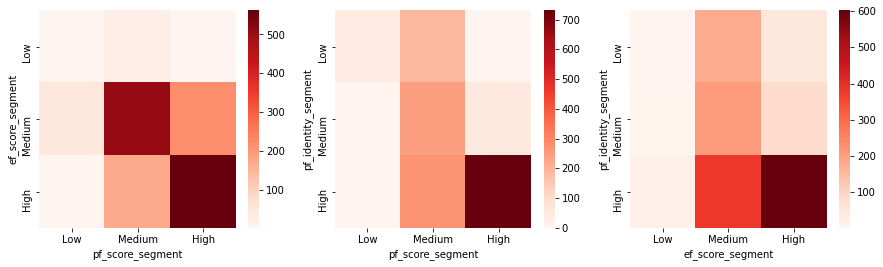

In [31]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4))
seaborn.heatmap(data=pandas.crosstab(dataset['ef_score_segment'], dataset['pf_score_segment']), cmap="Reds", ax=axs[0])
seaborn.heatmap(data=pandas.crosstab(dataset['pf_identity_segment'], dataset['pf_score_segment']), cmap="Reds", ax=axs[1])
seaborn.heatmap(data=pandas.crosstab(dataset['pf_identity_segment'], dataset['ef_score_segment']), cmap="Reds", ax=axs[2])

# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [32]:
import numpy as np
from scipy import stats

np.random.seed(987654321) # set random seed to get the same result
region_latam_carib = 'Latin America & the Caribbean'
years2choose = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
hist = dataset.loc[((dataset['region']==region_latam_carib)&(dataset['year'].isin(years2choose))),['year','pf_identity','hf_score']]
nhist = dataset.loc[((dataset['region']!=region_latam_carib)&(dataset['year'].isin(years2choose))),['year','pf_identity','hf_score']]

In [33]:
statistic_list = list()
pvalue_list = list()
nstatistic_list = list()
npvalue_list = list()
alternative_hypo = ['two-sided', 'less', 'greater']


In [34]:
st = stats.beta.fit(hist[hist.year==2017].pf_identity)
nst = stats.beta.fit(nhist[nhist.year==2017].pf_identity)
for alternative in alternative_hypo:
    s,p = stats.kstest(hist[hist.year==2017].pf_identity, 'beta', args=st, alternative=alternative)
    statistic_list.append(s)
    pvalue_list.append(p)

    s, p = stats.kstest(nhist[nhist.year==2017].pf_identity, 'beta', args=nst, alternative=alternative)
    nstatistic_list.append(s)
    npvalue_list.append(p)


(-0.1, 1.0)

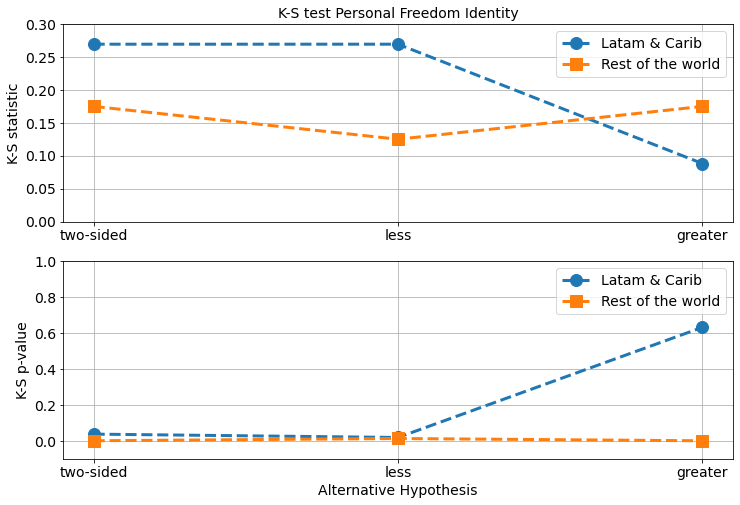

In [35]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(alternative_hypo, statistic_list,'--o', label='Latam & Carib', linewidth=3, markersize=12)
plt.plot(alternative_hypo, nstatistic_list,'--s', label='Rest of the world', linewidth=3, markersize=12)
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('K-S statistic', fontsize=14)
plt.title('K-S test Personal Freedom Identity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,0.3])

plt.subplot(2,1,2)
plt.plot(alternative_hypo, pvalue_list,'--o', label='Latam & Carib', linewidth=3, markersize=12)
plt.plot(alternative_hypo, npvalue_list,'--s', label='Rest of the world', linewidth=3, markersize=12)
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('K-S p-value', fontsize=14)
plt.xlabel('Alternative Hypothesis', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([-0.1,1])

En la figura de arriba se observan las graficas para el estadístico resultante de la prueba de Kolmogorov-Smirnof (sub figura superior) y el p-valor correspondiente a la hipótesis nula (sub figura inferior), cuando la función de distribución de los datos observados es igual la función distribución asumida. El eje de las abcisas se corresponde a la hipótesis alternativa cuando se la asume bilateral (mayor o menor que la referencia), menor y mayor que la referencia respectivamente.

De los resultados para la variable `pf_identity` correspondiente a Latinoamérica y el Caribe es posible decir respecto al p-value que los datos no son representativos o no dan soporte la hipótesis nula cuando consideramos la hipotesis alternativa bilateral o menor que la referencia. No obstante, en el caso que consideramos la hipótesis alternativa mayor que la refernecia, fallamos al rechazar la hipótesis nula ya que los datos parecen ser representativos o típicos. Al mismo tiempo podemos observar que el estadístico de K-S es pequeño en términos cualitativos.

En el caso del Resto del mundo para la variable `pf_identity`, no es posible aceptar la distribución propuesta dado que en ningún caso el grupo de datos parece ser representativo de las hipótesis planteadas por la prueba de K-S.

Para el caso de la variable `hf_score`, al igual que en el caso de la variable anterior, Latinoamérica y el Caribe parecen ajustarse a una distribución beta cuando la hipótesis alternativa se asume menor que la referencia y no podemos recharzar la hipótesis nula. En los restantes casos parece no haber soporte para la distribución asumida.

In [36]:
statistic_list = list()
pvalue_list = list()
nstatistic_list = list()
npvalue_list = list()
alternative_hypo = ['two-sided', 'less', 'greater']

st = stats.beta.fit(hist[hist.year==2017].hf_score)
nst = stats.beta.fit(nhist[nhist.year==2017].hf_score)
for alternative in alternative_hypo:
    s,p = stats.kstest(hist[hist.year==2017].hf_score, 'beta', args=st, alternative=alternative)
    statistic_list.append(s)
    pvalue_list.append(p)

    s, p = stats.kstest(nhist[nhist.year==2017].hf_score, 'beta', args=nst, alternative=alternative)
    nstatistic_list.append(s)
    npvalue_list.append(p)


(-0.1, 1.0)

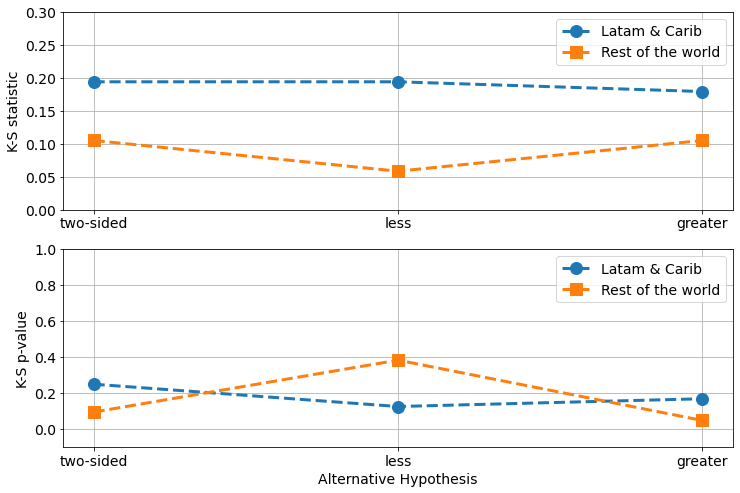

In [37]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(alternative_hypo, statistic_list,'--o', label='Latam & Carib', linewidth=3, markersize=12)
plt.plot(alternative_hypo, nstatistic_list,'--s', label='Rest of the world', linewidth=3, markersize=12)
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('K-S statistic', fontsize=14)
# plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,0.3])

plt.subplot(2,1,2)
plt.plot(alternative_hypo, pvalue_list,'--o', label='Latam & Carib', linewidth=3, markersize=12)
plt.plot(alternative_hypo, npvalue_list,'--s', label='Rest of the world', linewidth=3, markersize=12)
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('K-S p-value', fontsize=14)
plt.xlabel('Alternative Hypothesis', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([-0.1,1])

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

####4.3 Para el cálculo de correlación optamos por utilizar la fórmula de spearman por 2 razones claves: 
1. Spearman no asume distribución de los datos previamente. Funciones como pearson asumen que la distribución de los datos siguen una distribución gaussianas, y por los ejercicios anteriores no tenemos razón para asumir eso sobre nuestros datos.
2. Spearman puede ser útil en caso de que la función tenga relación no lineal.


In [38]:
dataset[['pf_identity','pf_score','ef_score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 0 to 1619
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pf_identity  1540 non-null   float64
 1   pf_score     1540 non-null   float64
 2   ef_score     1540 non-null   float64
dtypes: float64(3)
memory usage: 88.1 KB


In [39]:
dataset[['pf_identity','pf_score','ef_score']].sample(10)

pf_identity  pf_score  ef_score
1447          3.8      5.44      7.35
1148          7.5      7.38      6.52
940           7.5      6.24      6.23
698          10.0      9.46      7.78
395          10.0      9.04      8.32
412          10.0      8.85      7.90
1158          5.0      6.28      5.31
777           5.0      7.17      7.11
741           6.3      5.75      6.00
807           0.0      3.28      6.21

In [40]:
dataset[dataset['pf_identity'] < 0.5].describe()

year  pf_identity_legal  pf_identity_sex_male  \
count   100.000000                0.0                 100.0   
mean   2012.690000                NaN                   0.0   
std       2.862841                NaN                   0.0   
min    2008.000000                NaN                   0.0   
25%    2010.000000                NaN                   0.0   
50%    2013.000000                NaN                   0.0   
75%    2015.000000                NaN                   0.0   
max    2017.000000                NaN                   0.0   

       pf_identity_sex_female  pf_identity_sex  pf_identity_divorce  \
count                   100.0            100.0                100.0   
mean                      0.0              0.0                  0.0   
std                       0.0              0.0                  0.0   
min                       0.0              0.0                  0.0   
25%                       0.0              0.0                  0.0   
50%                       0.0              0.0                  0.0   
75%                       0.0              0.0                  0.0   
max                       0.0              0.0                  0.0   

       pf_identity   pf_score     pf_rank    ef_score     ef_rank    hf_score  \
count        100.0  100.00000  100.000000  100.000000  100.000000  100.000000   
mean           0.0    4.78060  145.380000    6.274700  106.050000    5.527700   
std            0.0    0.90574   10.272824    0.749411   35.649068    0.734564   
min            0.0    2.22000  118.000000    3.970000   29.000000    3.690000   
25%            0.0    4.38000  138.000000    5.857500   81.000000    5.337500   
50%            0.0    5.05500  147.000000    6.180000  113.000000    5.595000   
75%            0.0    5.38750  153.000000    6.880000  130.500000    6.182500   
max            0.0    6.25000  162.000000    7.540000  160.000000    6.560000   

          hf_rank  
count  100.000000  
mean   135.070000  
std     16.611579  
min    101.000000  
25%    121.000000  
50%    135.500000  
75%    149.000000  
max    162.000000

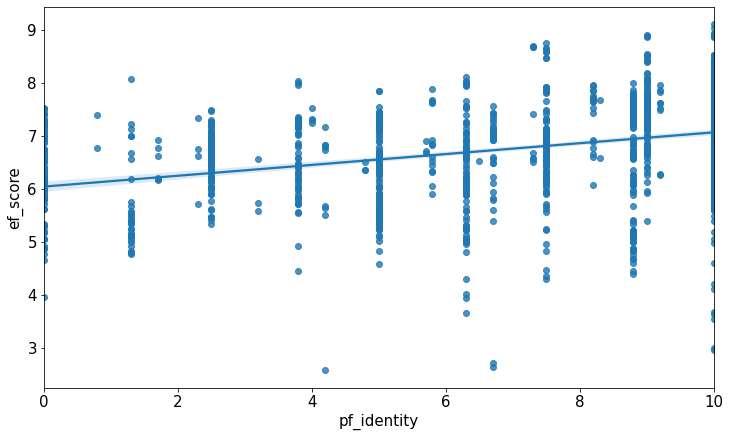

In [41]:
plt.figure(figsize=(12,7))
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
seaborn.regplot(data=dataset, x='pf_identity', y='ef_score')

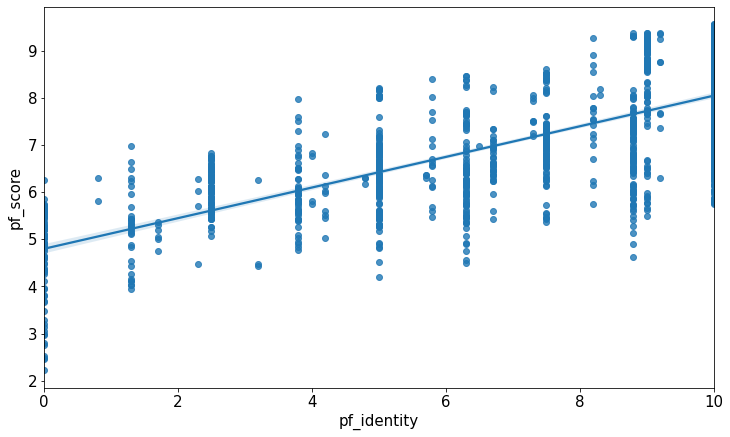

In [42]:
plt.figure(figsize=(12,7))
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
seaborn.regplot(data=dataset, x='pf_identity', y='pf_score')

Analizando todo el dataset, quitando solo los valores NaN...

In [43]:
from scipy.stats import spearmanr


In [44]:
df = dataset[['year','pf_identity','pf_score','ef_score']].dropna().sort_values('pf_identity') # TENER EN CUENTA QUE HAY 100 FILAS CON PF_IDENTITY = 0 y PF_SCORE != 0
df

year  pf_identity  pf_score  ef_score
95    2017          0.0      4.83      6.11
774   2013          0.0      4.47      6.40
122   2017          0.0      5.24      7.07
284   2016          0.0      5.26      7.21
288   2016          0.0      4.39      6.44
...    ...          ...       ...       ...
1012  2011         10.0      9.02      7.48
1013  2011         10.0      9.47      7.82
1014  2011         10.0      7.07      6.94
999   2011         10.0      9.26      8.00
1619  2008         10.0      9.13      9.11

[1540 rows x 4 columns]

In [45]:
spearman_p = spearmanr(df['pf_identity'],df['pf_score'])
spearman_p

SpearmanrResult(correlation=0.7313581415245098, pvalue=6.2822504661055415e-258)

In [46]:
spearman_p = spearmanr(df['pf_identity'],df['ef_score'])
spearman_p

SpearmanrResult(correlation=0.40077737030068, pvalue=1.6873618909139198e-60)

Agruparemos la informacion por año, solo para ver si el mismo comportamiento se presenta a lo largo de los años...

In [47]:
for i in range(2008,2017):
  corr, p = spearmanr(df[df['year'] == i]['pf_identity'],df[df['year'] == i]['pf_score'])
  print('- Year {}, corr: {} p-val: {}'.format(i,corr,p))

- Year 2008, corr: 0.7427268454669634 p-val: 5.548903487584818e-26
- Year 2009, corr: 0.7285212162335368 p-val: 1.3414182331296828e-24
- Year 2010, corr: 0.7552146736822329 p-val: 1.705212799419602e-29
- Year 2011, corr: 0.7435479162055434 p-val: 3.5187309103481623e-28
- Year 2012, corr: 0.7487105612283186 p-val: 9.409783747303183e-29
- Year 2013, corr: 0.7618068902350758 p-val: 4.966288474232245e-31
- Year 2014, corr: 0.7290340572947165 p-val: 1.229018100182041e-27
- Year 2015, corr: 0.7197043947716425 p-val: 1.1604872445839703e-26
- Year 2016, corr: 0.7225352937998358 p-val: 1.9408483020804868e-27


In [48]:
for year in range(2008,2017):
    corr, p = spearmanr(df[df['year'] == year]['pf_identity'],df[df['year'] == year]['ef_score'])
    print('- Year {}, corr: {} p-val: {}'.format(year,corr,p))

- Year 2008, corr: 0.45170397892711045 p-val: 1.8861762125679063e-08
- Year 2009, corr: 0.4525745399912372 p-val: 1.7576419842907807e-08
- Year 2010, corr: 0.4058899427205557 p-val: 1.9374471533821577e-07
- Year 2011, corr: 0.421959179027913 p-val: 5.559805826615896e-08
- Year 2012, corr: 0.43307720034121017 p-val: 2.25444804392254e-08
- Year 2013, corr: 0.4188177050016219 p-val: 4.7908106006208337e-08
- Year 2014, corr: 0.40669398113645916 p-val: 1.0405018441114918e-07
- Year 2015, corr: 0.37707092650414276 p-val: 9.620816930702083e-07
- Year 2016, corr: 0.3914888302862514 p-val: 2.5858974526690184e-07


Como era de esperarse, ‘pf_identity’ y ‘pf_score’ tiene alta correlación, ya que uno es función del otro. Y pudimos encontrar relación en menor magnitud entre ‘pf_identity’ y ‘ef_score’. Ambas correlaciones son positivas, esto quiere decir que cuando una aumenta, la otra variable también lo hace. Esto es, podemos esperar un aumento en ‘pf_identity’ cuando alguna de las variables ‘pf_score’ y ‘ef_score’ aumente.


# Referencias
1. [Documentación de Heatmap en seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
1. [Documentación de KS con scipy](http://greg-ashton.physics.monash.edu/using-scipy-ks-tes.html)
1. [Documentación Spearmanr con scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)
1. [Documentación Pearsonr con scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html)
1. [Documentación Kendalltau con scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)
1. [Kendall Rank Correlation Explained](https://towardsdatascience.com/kendall-rank-correlation-explained-dee01d99c535)
1. [How to Calculate Correlation Between Variables in Python](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)
1. [How to Calculate Nonparametric Rank Correlation in Python](https://machinelearningmastery.com/how-to-calculate-nonparametric-)


# Explicacion

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?

# Conclusiones

En la presente seccion se intenta responder a las preguntas establecidas al inicio del presente práctico.

### ¿Qué niveles de libertad se viven en Latinoamérica, específicamente en cuanto libertades de identidad?
Como se puede ver en el Parte 1 Ejercicio 1.3, en cuanto a libertades de identidad (pf_identity), latino america tiene una libertad actual de 7.400 en promedio en el último año. Si observamos la tabla la misma ha ido en descenso con el transcurso de los años, siendo el promedio actual el más bajo de todos. Sigue siendo un valor superior al promedio actual del resto mundo. 

### ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
En el contexto de latinoamérica y el caribe, el mínimo valor que asume la variable correspondiente a las libertades de identidad es de cuatro puntos aproximadamente, ver histogramas de la Parte 1 Ejercicio 3 año 2017. De este modo, en el contexto de la región y asumiendo un valor de 4.5 estaríamos en presencia de un mínimo local o regional. En otros términos es posible decir que las libertades de identidad se encuentran más reprimidas. Finalmente, en el contexto global (resto del mundo) podemos decir que un valor de 4.5 se corresponde a una realidad muy superadora respecto a algunas realidades del contexto global.

### ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
En base a lo mencionado y a la gráfica de la Parte 1 Ejercicio 2.1 se observa que la evolución de la variable es con pendiente negativa en relación al tiempo en años. En conclusión, estamos empeorando.

### ¿Se relacionan de la misma manera con la libertad de identidad?

En base al análisis realizado en la segunda parte del práctico, y en particular a los resultados de las gráficas pairplot que comparan la evolución conjunta de estas variables en cuestión. De ellos podemos observar cualitativamente que existe algún grado de correlación entre ellas.

A su vez, de los resultados generados en la Parte 2 Ejercicio 4.3 podemos obtener evidencia numérica del nivel de correlación existente. 

Analizando la gráfica pairplot, podemos concluir ciertos comportamientos de las variables mencionadas. La variable ef_score mantiene una distribución que tiende a la normal, a diferencia de los histogramas de las otras 2 variables. Además se observa la correlación de proporcionalidad directa entre pf_identity y pf_score. A su vez, se observa una correlación entre pf_identity y ef_score, aunque no es tan directa y es evidente en la dispersión de los datos.

